<a href="https://colab.research.google.com/github/Info-stats-ai/Stable-Diffusion/blob/main/impainting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
from PIL import Image

# Loading the model :

In [2]:
from diffusers import StableDiffusionInpaintPipeline
inpainting_model = "runwayml/stable-diffusion-inpainting"
device='cuda'
pipe=StableDiffusionInpaintPipeline.from_pretrained(inpainting_model,torch_dtype=torch.float16).to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [3]:
!pip install xformers

In [4]:
pipe.enable_attention_slicing()
pipe.enable_xformers_memory_efficient_attention()

In [5]:
def matrix_imgs(imgs, rows=1, col=3, sclae=1):
  assert len(imgs) == rows*col
  w, h = imgs[0].size
  w, h = int(w*sclae), int(h*sclae)
  matrix = Image.new('RGB', (col*w, rows*h))
  matrix_w, matrix_h = matrix.size
  for i, img in enumerate(imgs):
    img = img.resize((w, h), Image.ANTIALIAS)
    matrix.paste(img, box=(i%col*w, i//col*h))
  return matrix

In [6]:
img_path = "/content/bench_img.jpg"

In [7]:
img = Image.open(img_path).convert('RGB')

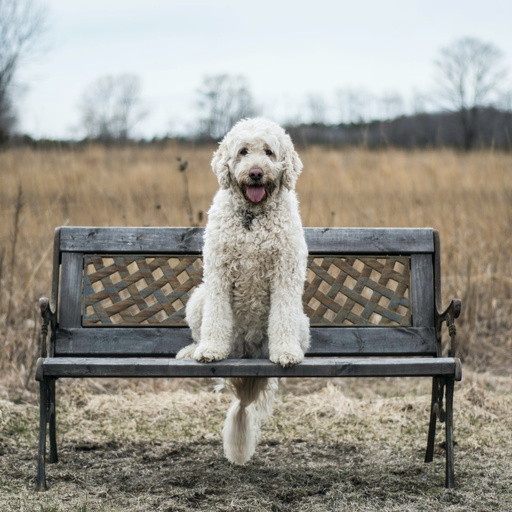

In [8]:
img

#Loading the Mask :

In [11]:
img_mask_path = '/content/bench_img_mask.jpg'

In [12]:
img_mask = Image.open(img_mask_path)

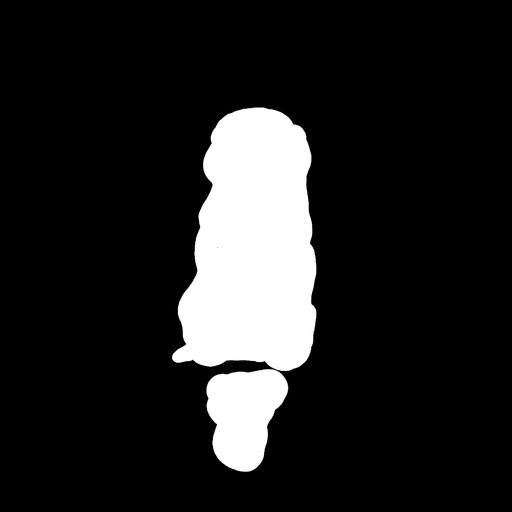

In [13]:
img_mask

In [14]:
seed = 777

# Creating a Prompt:

In [15]:
prompt = ""
generator = torch.Generator(device=device).manual_seed(seed)
result_img = pipe(prompt=prompt, image=img, mask_image=img_mask, generator=generator).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

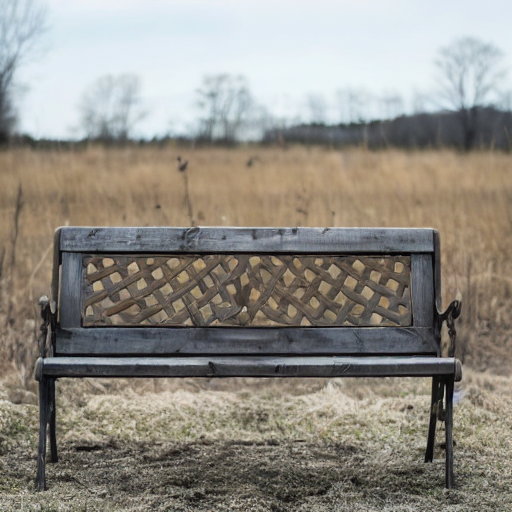

In [16]:
result_img

# exchanging the objects:

  0%|          | 0/50 [00:00<?, ?it/s]

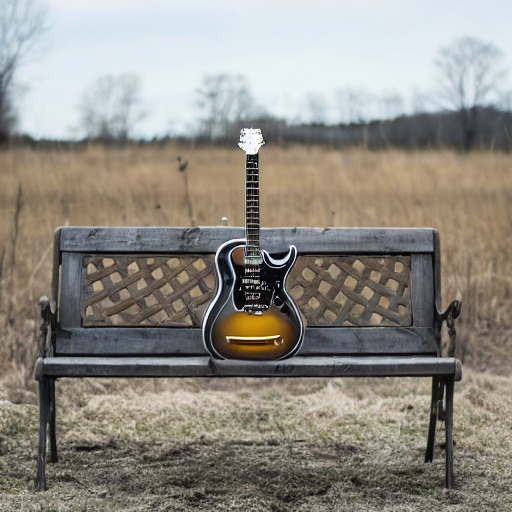

In [17]:
prompt = " an beautiful electric guitar"
generator = torch.Generator(device=device).manual_seed(seed)
result_img = pipe(prompt=prompt, image=img, mask_image=img_mask, generator=generator).images[0]
result_img

# Comparing the Images:

  0%|          | 0/50 [00:00<?, ?it/s]

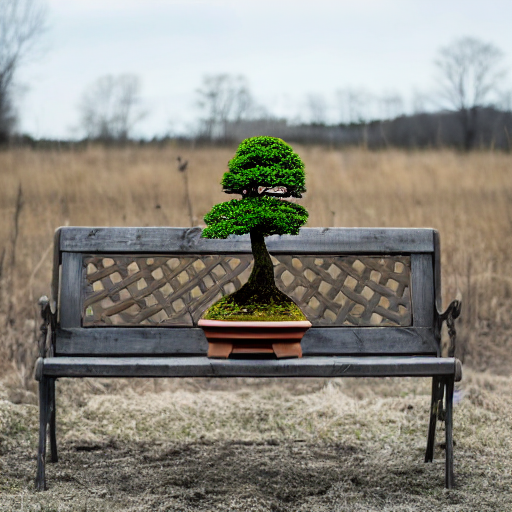

In [18]:
prompt = " an bonsai tree"
generator = torch.Generator(device=device).manual_seed(seed)
result_img = pipe(prompt=prompt, image=img, mask_image=img_mask, generator=generator).images[0]
result_img

#